In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
# Kjente størrelser
muG = 9.81
sdG = 0.02
muV0 = 20
sdV0 = 2
muTh = np.pi/5
sdTh = 0.052

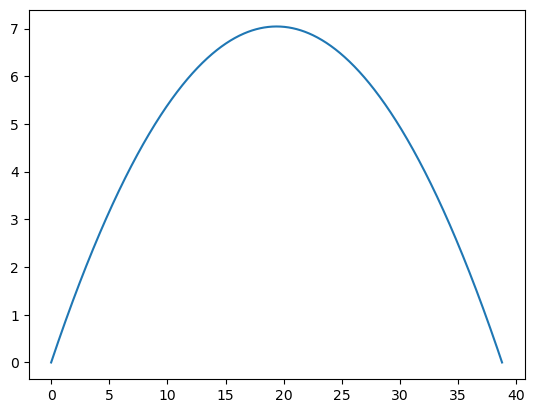

In [7]:
# Anta kjente parametere
g = muG
v0 = muV0
theta = muTh

# plott bane
tVals = np.linspace(0, 2*v0*np.sin(theta)/g, 1000)
xVals = np.cos(theta)*v0*tVals
yVals = np.sin(theta)*v0*tVals-0.5*g*tVals**2
plt.plot(xVals, yVals)

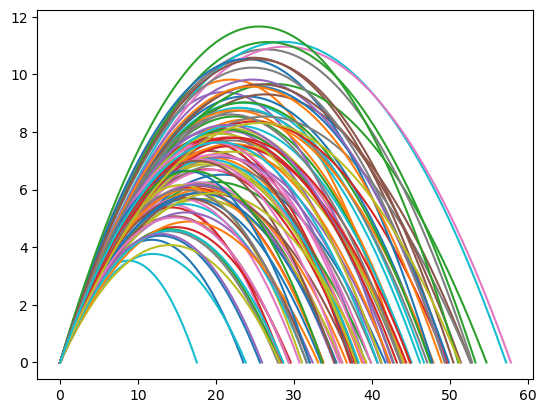

In [11]:
# Gaussisk fordelte

for i in range(100):
    g = stats.norm.rvs(muG, sdG)
    v0 = stats.norm.rvs(muV0, sdV0)
    theta = stats.norm.rvs(muTh, sdTh)
    
    # plott bane
    tVals = np.linspace(0, 2*v0*np.sin(theta)/g, 1000)
    xVals = np.cos(theta)*v0*tVals
    yVals = np.sin(theta)*v0*tVals-0.5*g*tVals**2
    plt.plot(xVals, yVals)

38.96617107884374
7.817956637220611


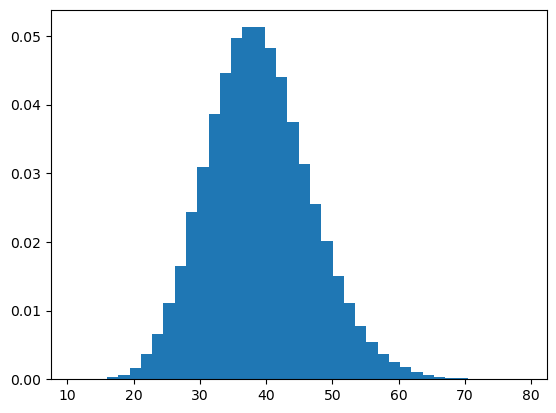

In [38]:
# Simuler
nSamp = 100000
gSamp = stats.norm.rvs(muG, sdG, size = nSamp)
v0Samp = stats.norm.rvs(muV0, sdV0, size = nSamp)
thetaSamp = stats.norm.rvs(muTh, sdTh, size = nSamp)

# Plott histogram
dSamp = v0Samp**2*np.sin(2*thetaSamp)/gSamp
plt.hist(dSamp, density = True, bins = 40)

# Estimer
muEst = np.mean(dSamp)
print(muEst)
sdEst = np.sqrt(np.var(dSamp))
print(sdEst)

In [34]:
# Gauss feilforplantningslov
var1 = (-muV0**2/muG**2*np.sin(2*muTh))**2*sdG**2
var2 = (2*muV0/muG*np.sin(2*muTh))**2*sdV0**2
var3 = (2*muV0**2/muG*np.cos(2*muTh))**2*sdTh**2
varGauss = var1+var2+var3
print(var1/varGauss*100)
print(var2/varGauss*100)
print(var3/varGauss*100)
print(varGauss)
print("Estimated sd with Gauss error propagation")
print(np.sqrt(varGauss))

0.010101689554394035
97.21472061256195
2.7751776978836578
61.876049459539175
Estimated sd with Gauss error propagation
7.866133069020583
